In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

plt.style.use('dark_background')

%matplotlib inline

In [17]:
Data_1 = pd.read_csv("imdb_top_1000.csv")
Data_1.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [19]:
Movie_overviews = Data_1[['Series_Title', 'Overview']]
Data_2 = Data_1.drop(['Overview','Poster_Link', 'Star3', 'Star4', 'Star2'], axis=1)

In [16]:
Movie_overviews.head(2)

,Series_Title,Overview
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...
1,The Godfather,An organized crime dynasty's aging patriarch t...


In [58]:
Data_2['Meta_score'] = Data_2.Meta_score.apply(lambda x: x/10)
Data_2['Meta_score']

0       8.0
1      10.0
2       8.4
3       9.0
4       9.6
       ... 
995     7.6
996     8.4
997     8.5
998     7.8
999     9.3
Name: Meta_score, Length: 1000, dtype: float64

In [21]:
Data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   No_of_Votes    1000 non-null   int64  
 10  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [37]:
Data_2[Data_2['Meta_score'].isnull()][Data_2['Gross'].isnull()][Data_2['Certificate'].isnull()]

/tmp/ipykernel_29087/2640070102.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_2[Data_2['Meta_score'].isnull()][Data_2['Gross'].isnull()][Data_2['Certificate'].isnull()]


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,No_of_Votes,Gross
54,Ayla: The Daughter of War,2017,NaN,125 min,"Biography, Drama, History",8.4,NaN,Can Ulkay,Erdem Can,34112,NaN
77,Tengoku to jigoku,1963,NaN,143 min,"Crime, Drama, Mystery",8.4,NaN,Akira Kurosawa,Toshirô Mifune,34357,NaN
92,Babam ve Oglum,2005,NaN,112 min,"Drama, Family",8.3,NaN,Çagan Irmak,Çetin Tekindor,78925,NaN
163,Eskiya,1996,NaN,128 min,"Crime, Drama, Thriller",8.2,NaN,Yavuz Turgul,Sener Sen,64118,NaN
181,Yôjinbô,1961,NaN,110 min,"Action, Drama, Thriller",8.2,NaN,Akira Kurosawa,Toshirô Mifune,111244,NaN
229,Mary and Max,2009,NaN,92 min,"Animation, Comedy, Drama",8.1,NaN,Adam Elliot,Toni Collette,164462,NaN
292,El ángel exterminador,1962,NaN,95 min,"Drama, Fantasy",8.1,NaN,Luis Buñuel,Silvia Pinal,29682,NaN
296,Ivanovo detstvo,1962,NaN,95 min,"Drama, War",8.1,NaN,Andrei Tarkovsky,Eduard Abalov,31728,NaN
299,Les quatre cents coups,1959,NaN,99 min,"Crime, Drama",8.1,NaN,François Truffaut,Jean-Pierre Léaud,105291,NaN
301,Kakushi-toride no san-akunin,1958,NaN,139 min,"Adventure, Drama",8.1,NaN,Akira Kurosawa,Toshirô Mifune,34797,NaN


In [35]:
Data_2[Data_2['Meta_score'].isnull()][Data_2['Gross'].isnull()][Data_2['Certificate'].isnull()].shape

/tmp/ipykernel_29087/455516980.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_2[Data_2['Meta_score'].isnull()][Data_2['Gross'].isnull()][Data_2['Certificate'].isnull()].shape


(35, 11)

In [36]:
Data_2[Data_2['Meta_score'].isnull()].shape

(157, 11)

In [33]:
Data_2[Data_2['Gross'].isnull()].shape

(169, 11)

In [34]:
Data_2[Data_2['Certificate'].isnull()].shape

(101, 11)

## the relationship between IMDB and Meta_score

In [61]:
Ratings = Data_2[['Meta_score','IMDB_Rating']]

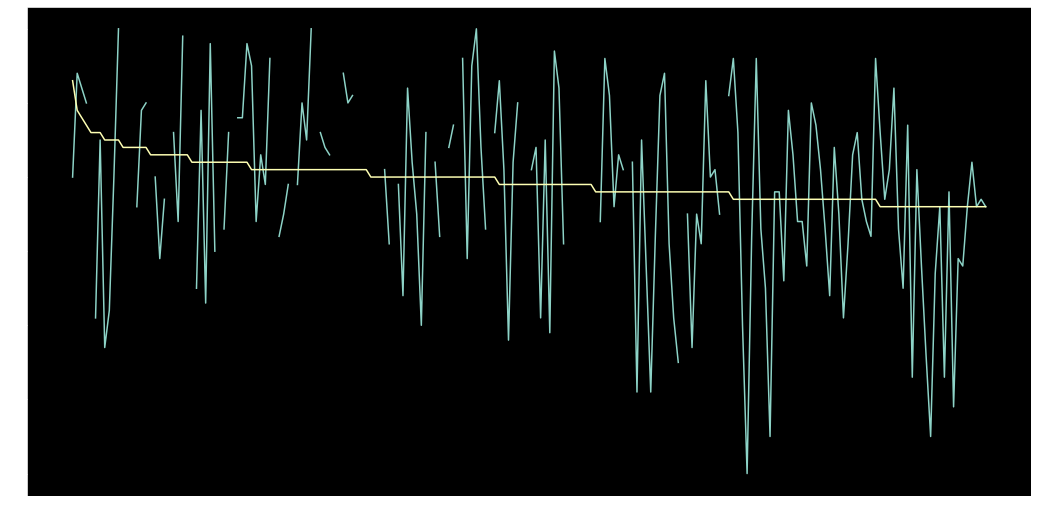

In [83]:
plt.figure(figsize=(18,9))
plt.plot(Ratings[::5])

In [60]:
Data_2.Meta_score.describe()

count    843.000000
mean       7.797153
std        1.237610
min        2.800000
25%        7.000000
50%        7.900000
75%        8.700000
max       10.000000
Name: Meta_score, dtype: float64

In [55]:
Data_2.IMDB_Rating.describe()

count    1000.000000
mean        7.949300
std         0.275491
min         7.600000
25%         7.700000
50%         7.900000
75%         8.100000
max         9.300000
Name: IMDB_Rating, dtype: float64

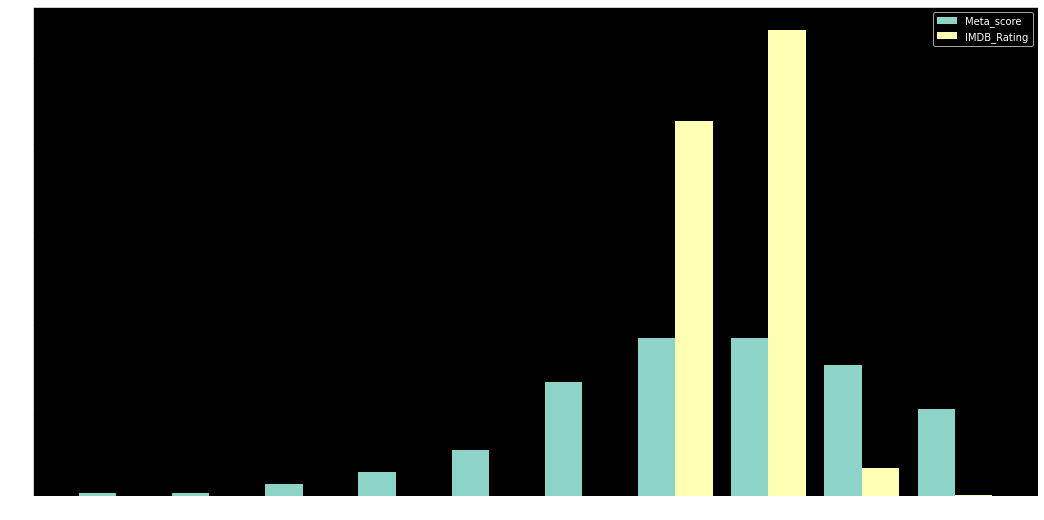

In [79]:
plt.figure(figsize=(18,9))
plt.hist(Ratings)
plt.legend(["Meta_score", 'IMDB_Rating'])

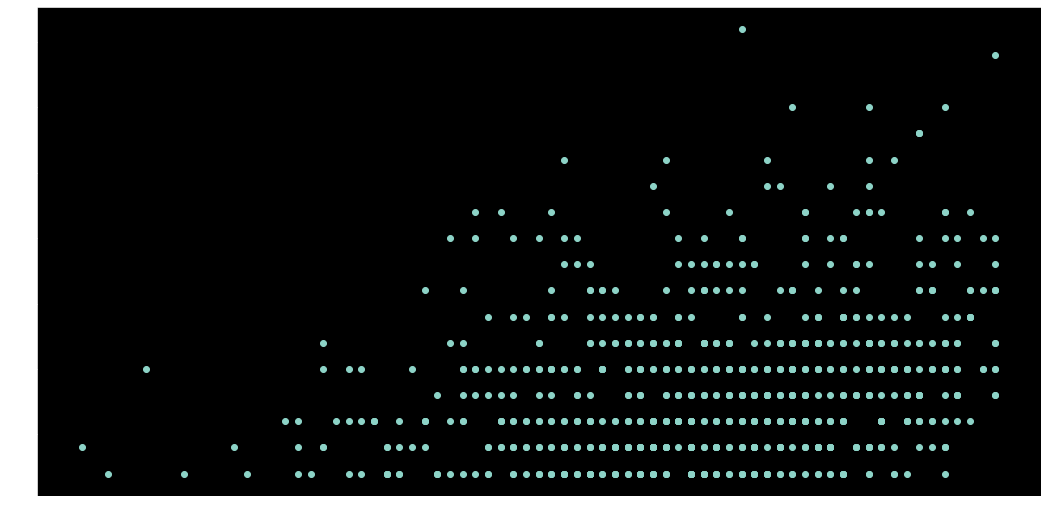

In [89]:
plt.figure(figsize=(18,9))
plt.scatter(Ratings.Meta_score,Ratings.IMDB_Rating)

In [102]:
LR_data = Data_2[["Gross", 'IMDB_Rating', 'Meta_score', 'No_of_Votes']]
LR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gross        831 non-null    object 
 1   IMDB_Rating  1000 non-null   float64
 2   Meta_score   843 non-null    float64
 3   No_of_Votes  1000 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


# Gross

In [105]:
Gros = Data_2['Gross']

In [146]:
Gros1 = []

for x in Gros:
    if type(x)!=int and type(x)!=float:
        x = x.split(',')
        x = int(''.join(x))
        
        Gros1.append(x)
    else:
        Gros1.append(x)

In [150]:
Gros = pd.DataFrame(Gros1)
Gros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       831 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [151]:
Gros.describe()

,0
count,8.310000e+02
mean,6.803475e+07
std,1.097500e+08
min,1.305000e+03
25%,3.253559e+06
50%,2.353089e+07
75%,8.075089e+07
max,9.366622e+08


(array([638.,  98.,  49.,  26.,  11.,   2.,   2.,   2.,   1.,   2.]),
 array([1.30500000e+03, 9.36673970e+07, 1.87333489e+08, 2.80999581e+08,
        3.74665673e+08, 4.68331765e+08, 5.61997857e+08, 6.55663949e+08,
        7.49330041e+08, 8.42996133e+08, 9.36662225e+08]),
 <BarContainer object of 10 artists>)

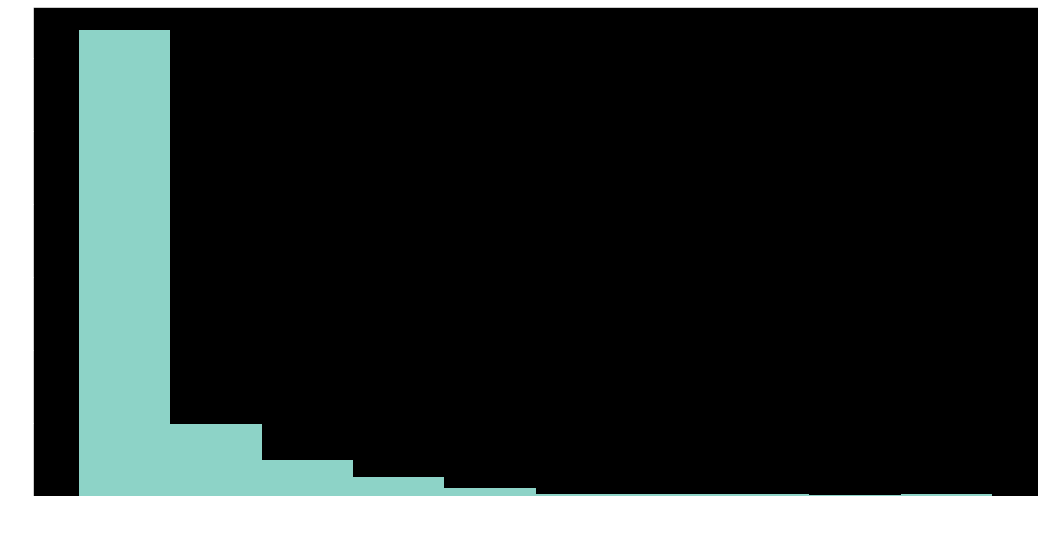

In [153]:
plt.figure(figsize=(18,9))
plt.hist(Gros)

In [156]:
LR_data['Gross'] = Gros.apply(np.log)

/tmp/ipykernel_29087/1372267682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LR_data['Gross'] = Gros.apply(np.log)


In [159]:
LR_data.Gross.describe()

count    831.000000
mean      16.423573
std        2.410405
min        7.173958
25%       14.995247
50%       16.973825
75%       18.206875
max       20.657833
Name: Gross, dtype: float64

<AxesSubplot:>

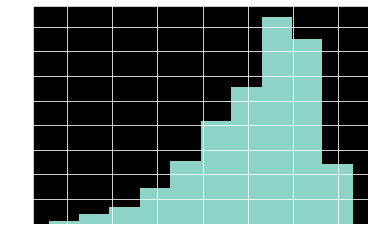

In [160]:
LR_data.Gross.hist()

## No_of_Votes normalization

In [161]:
LR_data.No_of_Votes.describe()

count    1.000000e+03
mean     2.736929e+05
std      3.273727e+05
min      2.508800e+04
25%      5.552625e+04
50%      1.385485e+05
75%      3.741612e+05
max      2.343110e+06
Name: No_of_Votes, dtype: float64

<AxesSubplot:>

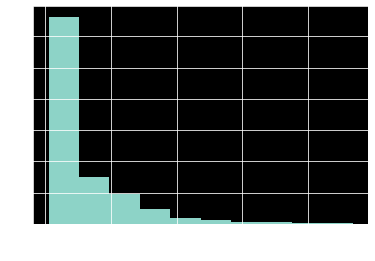

In [162]:
LR_data.No_of_Votes.hist()

In [164]:
LR_data['No_of_Votes'].apply(np.log).describe()

count    1000.000000
mean       11.906921
std         1.120576
min        10.130145
25%        10.924610
50%        11.838975
75%        12.832441
max        14.666990
Name: No_of_Votes, dtype: float64

## with $np.log$

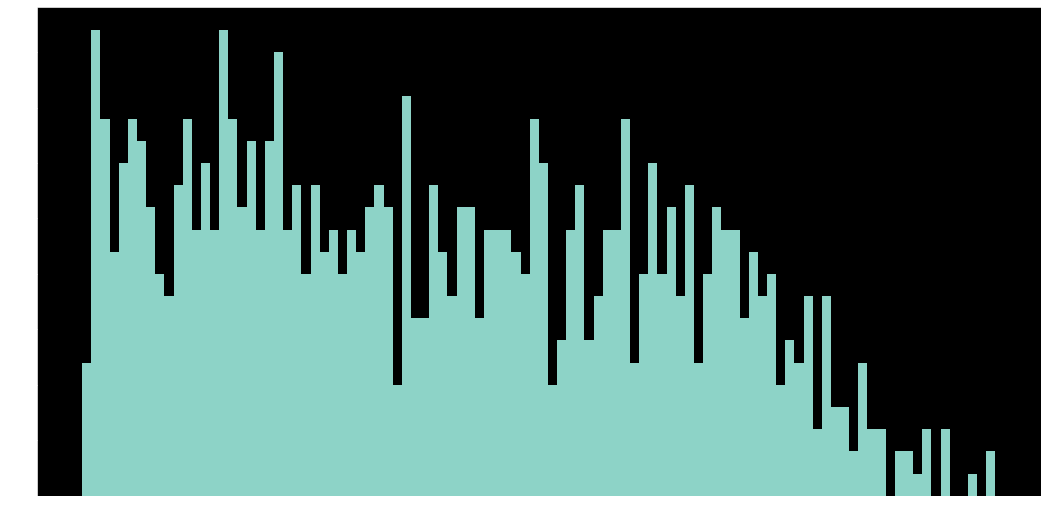

In [171]:
plt.figure(figsize=(18,9))
plt.hist(LR_data['No_of_Votes'].apply(np.log), bins=100)
plt.show()

## with $ (x-min(x))/x$

<AxesSubplot:>

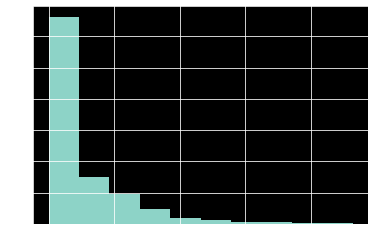

In [168]:
LR_data['No_of_Votes'].apply(lambda x: (x-LR_data['No_of_Votes'].min()) / 1000).hist()

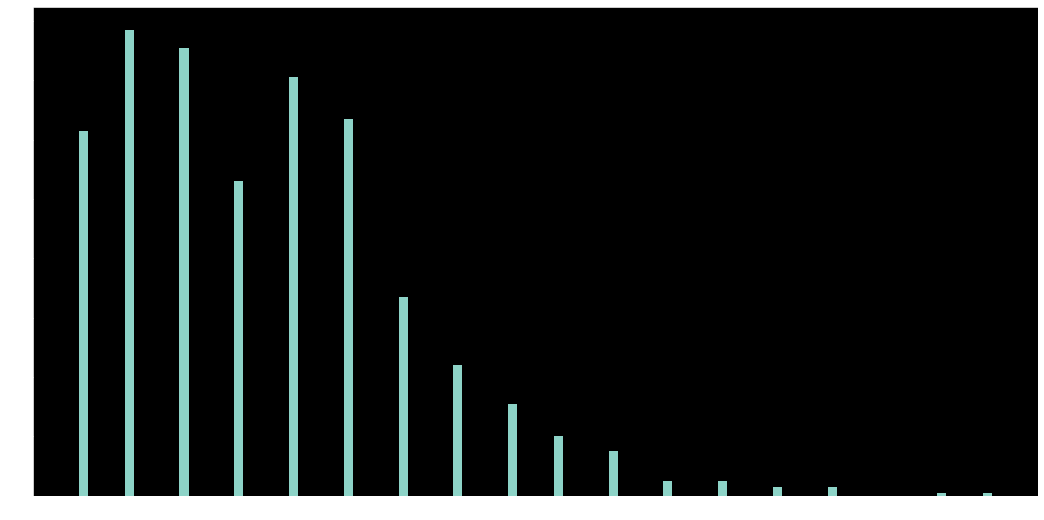

In [178]:
plt.figure(figsize=(18,9))
plt.hist(LR_data['IMDB_Rating'], bins=100)
plt.show()

## To sum up

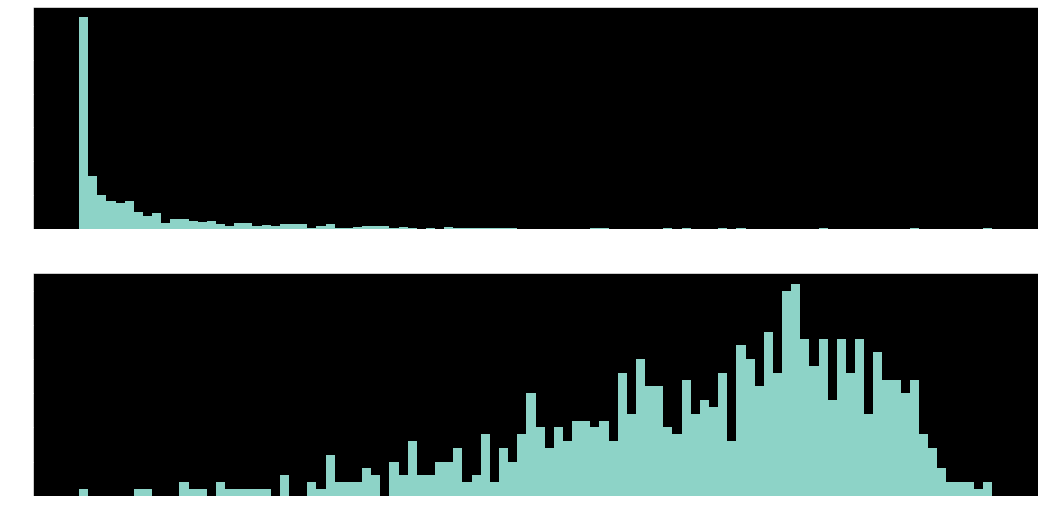

In [202]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,9))

ax1.hist(Gros, bins=100)
ax2.hist(LR_data['Gross'], bins=100)

plt.show()

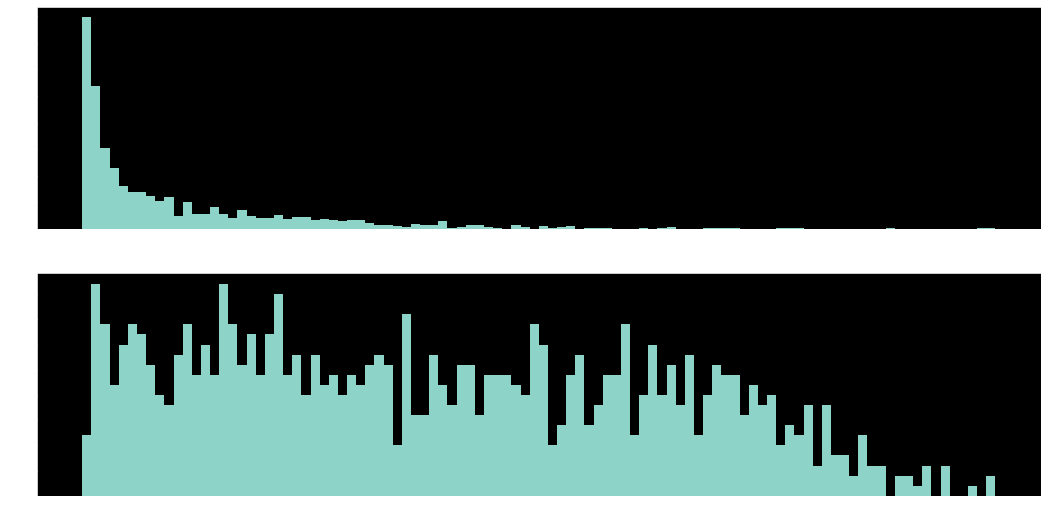

In [204]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,9))

ax1.hist(LR_data['No_of_Votes'], bins=100)
ax2.hist(LR_data['No_of_Votes'].apply(np.log), bins=100)

plt.show()

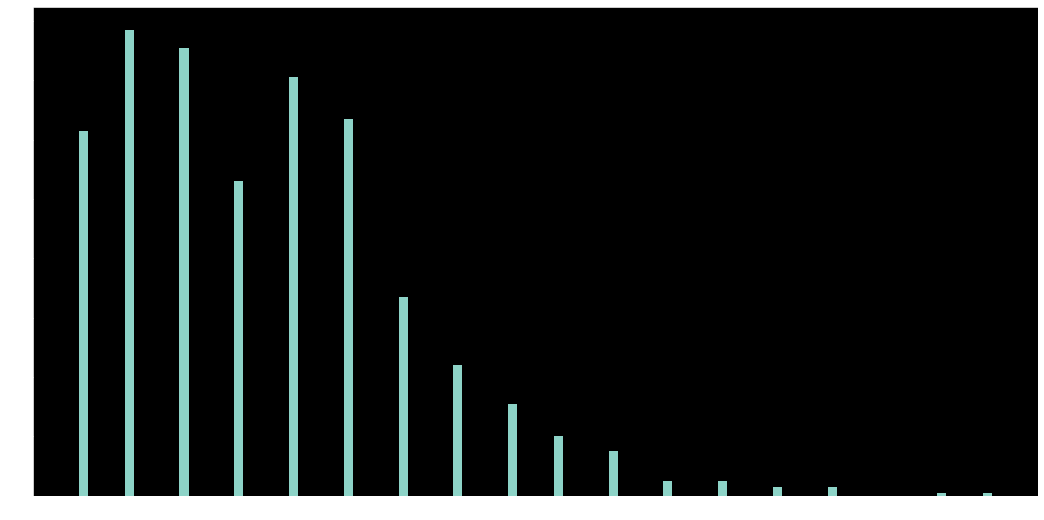

In [181]:
plt.figure(figsize=(18,9))
plt.hist(LR_data['IMDB_Rating'], bins=100)
plt.show()

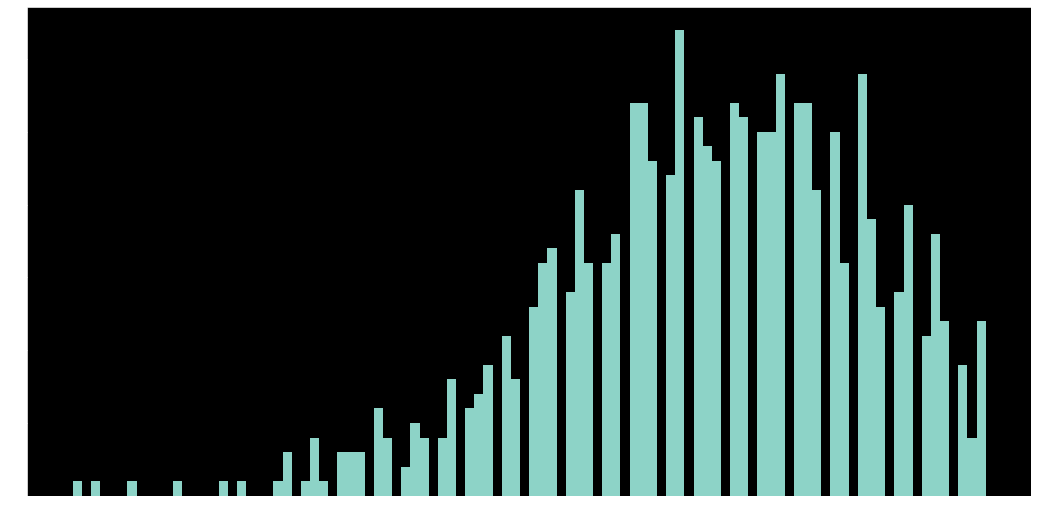

In [184]:
plt.figure(figsize=(18,9))
plt.hist(LR_data['Meta_score'], bins=100)
plt.show()

In [205]:
LR_data['No_of_Votes'] = LR_data['No_of_Votes'].apply(np.log)

/tmp/ipykernel_29087/735926399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LR_data['No_of_Votes'] = LR_data['No_of_Votes'].apply(np.log)


In [209]:
LR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gross        831 non-null    float64
 1   IMDB_Rating  1000 non-null   float64
 2   Meta_score   843 non-null    float64
 3   No_of_Votes  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [211]:
filtered_LR_data = LR_data[LR_data['Meta_score'].isna()==False][LR_data['Gross'].isna()==False]
filtered_LR_data.head()

/tmp/ipykernel_29087/3412373096.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_LR_data = LR_data[LR_data['Meta_score'].isna()==False][LR_data['Gross'].isna()==False]


,Gross,IMDB_Rating,Meta_score,No_of_Votes
0,17.159837,9.3,8.0,14.666990
1,18.720536,9.2,10.0,14.298163
2,20.097513,9.0,8.4,14.649824
3,17.863811,9.0,9.0,13.937686
4,15.287983,9.0,9.6,13.444222


In [214]:
X = filtered_LR_data.drop('Meta_score', axis=1)
y = filtered_LR_data['Meta_score']

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [218]:
LR_model = LinearRegression()
LR_model

LinearRegression()

In [219]:
LR_model.fit(X,y)

LinearRegression()

In [224]:
LR_model.coef_

array([ 0.05805325,  1.74912393, -0.32594627])

In [225]:
LR_model.feature_names_in_

array(['Gross', 'IMDB_Rating', 'No_of_Votes'], dtype=object)

In [227]:
LR_predict = LR_model.predict(LR_data[LR_data['Gross'].isna()==False].drop('Meta_score', axis=1))

In [250]:
LR_result = pd.DataFrame( {'LR_Meta_score' : LR_predict , 'Meta_score' : LR_data[LR_data['Gross'].isna()==False]['Meta_score']})

In [253]:
LR_result

,LR_Meta_score,Meta_score
0,9.366433,8.0
1,9.402342,10.0
2,9.017833,8.4
3,9.120278,9.0
4,9.131585,9.6
...,...,...
990,7.596717,7.7
991,7.503293,5.0
992,7.348470,6.5
994,7.674929,9.6


In [255]:
LR_result_filtered = LR_result[LR_result.Meta_score.isna()==False]
LR_result_filtered

,LR_Meta_score,Meta_score
0,9.366433,8.0
1,9.402342,10.0
2,9.017833,8.4
3,9.120278,9.0
4,9.131585,9.6
...,...,...
990,7.596717,7.7
991,7.503293,5.0
992,7.348470,6.5
994,7.674929,9.6


In [260]:
y_true = LR_result_filtered['Meta_score']
y_pred = LR_result_filtered['LR_Meta_score']


In [300]:
score_list = []
for x in range(750):
    score_list.append(abs(y_true.iloc[x] - y_pred.iloc[x]))
    
total_score =  sum(score_list) / len(score_list)
total_score

0.9352266304704796

In [302]:
LR_result_filtered['LR_Meta_score'].describe()

count    750.000000
mean       7.746000
std        0.426463
min        6.866265
25%        7.428545
50%        7.736684
75%        8.011936
max        9.402342
Name: LR_Meta_score, dtype: float64

In [303]:
LR_result_filtered['Meta_score'].describe()

count    750.000000
mean       7.746000
std        1.249397
min        2.800000
25%        7.000000
50%        7.800000
75%        8.600000
max       10.000000
Name: Meta_score, dtype: float64